## Urban Sounds Classification using the NN

Data visualization, essentially a visual aid for development. Will help to grasp the concept of the transformation from audio into csv for NN design.

Based off of:

 - 2 yt videos
 - medium.com
 - chatgpt (help)
 - librosa documentation

In [1]:
import pandas as pd
import numpy as np
import os # find all the file paths
import tqdm # progress bar on long runs
import librosa
import librosa.display
import IPython.display as ipd # tool to play audios
from scipy.io import wavfile as wav


import matplotlib.pyplot as plt
%matplotlib inline 
# allows to plot graphs inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./UrbanSound8K/metadata/UrbanSound8K.csv')

df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [3]:
# file with a dog barking
dog_sample = './UrbanSound8K/audio/fold1/7383-3-0-0.wav' 

ipd.Audio(dog_sample)

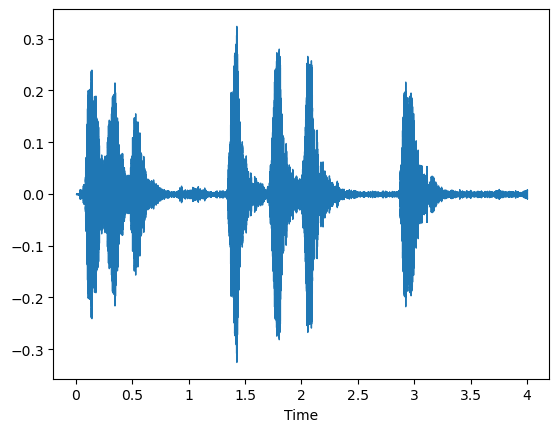

In [4]:
data, sample_rate = librosa.load(dog_sample)

librosa.display.waveshow(data, sr=sample_rate)

In the next outputs, we see a discrepancy in the frequency rates.
The librosa resamples the rate to a default 22050Hz, while the SciPy method reads the file with its native sample rate without resampling.

To set librosa to work with the native sample rate, we do:
```py
librosa.load(filename, sr=None)
```
In sound analysis, **librosa** is the go-to library since it **standardizes all the audio** into mono, same rate, for better consistency along the training.

In [5]:
sample_rate

22050

In [6]:
wave_sample_rate, wave_audio=wav.read(dog_sample)

wave_sample_rate

44100

Pedi ao chat os prints, e dps dei cap para esta funcao, para mostrar essencialmente oq tamos a trabalhar com. Ja vou escrever key points num texto direitinho, depois ve se o resto.

In [7]:
# print the wave_audio array in a readable way
########### dei cap a 50000, e ele escolhe o minimo senao crasha-se todo
def print_wave_audio(audio_array, cap=50000):
    print("\nWave Audio Data (Stereo Channels):")
    print(f"{'Index':<10}{'Channel 1':<15}{'Channel 2'}")
    print("-" * 40)
    
    for idx in range(min(cap, len(audio_array))):
        ch1, ch2 = audio_array[idx]
        print(f"{idx:<10}{ch1:<15}{ch2}")

    if len(audio_array) > cap:
        print(f"\n ... (total entries: {len(audio_array)})")

The **values in Channel 1 and Channel 2** represent the amplitude of the audio signal at each sample point. In digital audio, amplitude values can range from negative to positive.

- Positive values represent a pressure increase in sound waves (compression).
- Negative values represent a pressure decrease (rarefaction).
- 0 means no sound (silence).

In [8]:
print_wave_audio(wave_audio)


Wave Audio Data (Stereo Channels):
Index     Channel 1      Channel 2
----------------------------------------
0         0              0
1         0              0
2         0              0
3         0              0
4         0              0
5         0              0
6         0              0
7         0              0
8         0              0
9         0              0
10        0              0
11        0              0
12        0              0
13        0              0
14        0              0
15        0              0
16        0              0
17        0              0
18        0              0
19        0              0
20        0              0
21        0              0
22        0              0
23        0              0
24        0              0
25        0              0
26        0              0
27        0              0
28        0              0
29        0              0
30        0              0
31        0              0
32        0             

Isto e a conversao do array que ta acima para amplitude/time, so para mostrar.


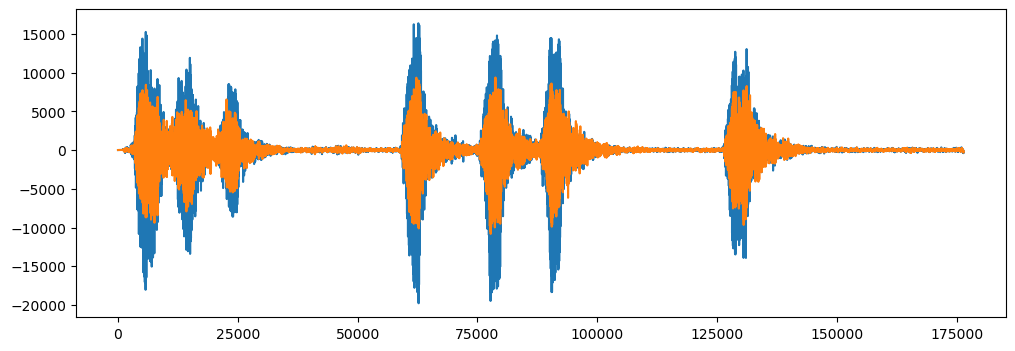

In [9]:
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

---
A spectrogram shows how the frequency content of the audio changes over time.

It's important since it stores how the frequency content of the audio changes over time, and can be used for feature extraction.

The time-frequency analysis might be importaant for it.

However the sound can be noisy and less informative regarding the task of distinguishing different sound types.

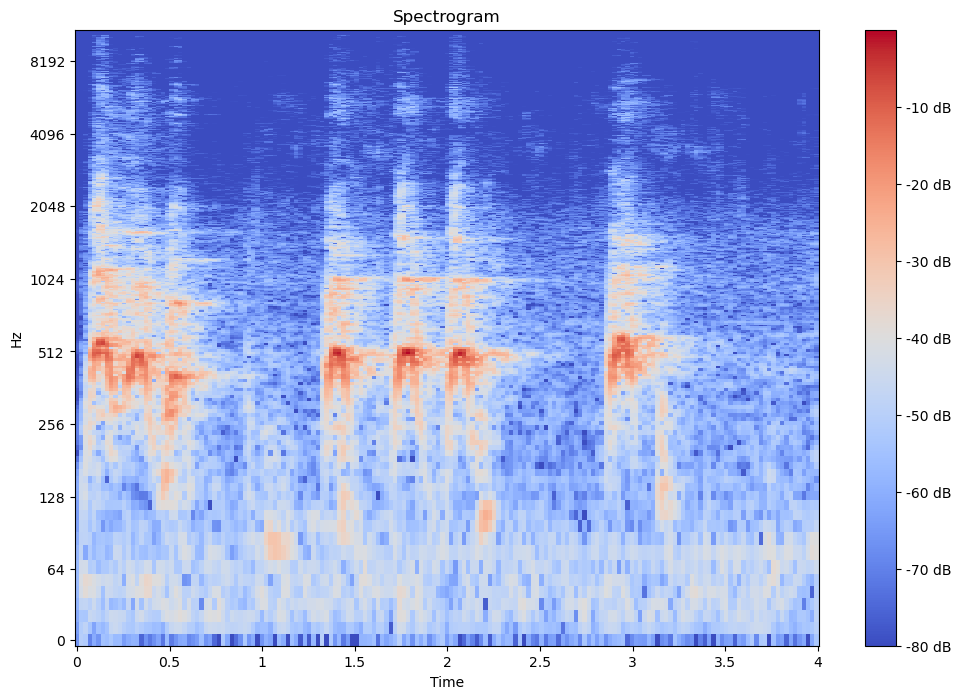

In [10]:
import librosa
import librosa.display
import matplotlib.pyplot as plt


D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)

# Plotting the spectrogram
plt.figure(figsize=(12, 8))
librosa.display.specshow(D, sr=sample_rate, x_axis='time', y_axis='log', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()


### Em relacao ao csv

In [11]:
df['class'].value_counts() # e balanced ate, talvez seja preciso ver algo em relacao aos ultimos 2

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

## Feature extraction
The **librosa** library has a built-in method for feature extraction, called [Mel-Frequency Cepstral Coefficients](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum), that summarises the frequency distribution across the time window.

(((Nao sei ate que ponto este https://www.youtube.com/watch?v=4_SH2nfbQZ8 e worth, mas demora 1 hora, se estiver mal vemos.)))

In [12]:
filename='./UrbanSound8K/audio/fold6/4910-3-0-0.wav' # vou usar agora a sample do medium.com
audio_data,sample_rate=librosa.load(filename)
mfccs=librosa.feature.mfcc(y=audio_data,sr=sample_rate, n_mfcc=40)

print(mfccs.shape)
print(mfccs)

(40, 27)
[[-2.0414842e+02 -7.3352737e+01 -3.1521664e+01 ... -2.8262634e+02
  -3.0813928e+02 -3.4986868e+02]
 [ 1.6085672e+02  1.5085524e+02  1.3205713e+02 ...  1.7034235e+02
   1.5520447e+02  1.3646313e+02]
 [-4.7794086e+01 -8.1008530e+01 -9.6134056e+01 ...  1.7801125e+01
   2.7814308e+01  3.0667643e+01]
 ...
 [ 4.6877160e+00  4.1728520e+00  5.8777542e+00 ... -5.5216968e-01
  -3.8437569e-01  1.2286532e+00]
 [-5.4100494e+00 -2.0135705e+00 -4.6312757e+00 ...  6.4753336e-01
   4.2026057e+00  6.5489321e+00]
 [ 2.9391069e+00  5.7025409e+00  2.9054716e-01 ... -7.5210631e-01
  -9.4152790e-01 -2.8816466e+00]]


In [31]:
import numpy as np
from tqdm import tqdm
import os

# estas funcoes foram todas usadas antes, usa o MFCC
def features_extractor_1D(file):
    audio, sample_rate = librosa.load(file_name) 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0) # Take the mean across time axis
    return mfccs_scaled_features

# estas funcoes foram todas usadas antes, usa o MFCC
def features_extractor_2D(file):
    audio, sample_rate = librosa.load(file_name) 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    return mfccs_features

audio_dataset_path='./UrbanSound8K/audio/'
extracted_features=[]


for index_num,row in tqdm(df.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    
    final_class_labels=row["class"]
    
    data=features_extractor_1D(file_name) # change here to run on 1D or 2D, change the export to csv line as well
    extracted_features.append([data,final_class_labels])
    
# converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

8732it [02:37, 55.33it/s] 


,feature,class
0,"[-211.93698, 62.58121, -122.813156, -60.745293...",dog_bark
1,"[-417.0052, 99.336624, -42.995583, 51.073326, ...",children_playing
2,"[-452.39316, 112.36253, -37.578068, 43.195866,...",children_playing
3,"[-406.47922, 91.1966, -25.043556, 42.78452, 11...",children_playing
4,"[-439.63873, 103.86223, -42.658787, 50.690285,...",children_playing


In [28]:
# check number of dimensions to be sure
extracted_features_df['feature'][1].ndim


2

### sobre o codigo
Da average do MFCC para passar de um array 2D para 1D de 40 features, para resumir o audio file de um modo mais compacto.
Contudo, nao sei ate que ponto vai ser preciso 2D, o stor falou disto na aula e eu ja nao me lembro KEK.

- Depois ele itera sobre as pastas todas, procura o nome do ficheiro, cria um df com 2 colunas, uma de feaures que e o array 1D, e a classe, isso ai fui ver como se fazia e encontrei no medium.

- Eles usavam um parametro para o tipo de resampling chamado "kaiser_fast" dentro do librosa.load(), mas no meu pc n tava a dar pq nao encontrava uma library ent so tirei para testar, mas serve para especificar o metodo de resampling, e e dos melhores resampling techniques in librosa aparentemente.

---

Vou so exportar este csv final, para ficarmos ja com ele e nao terem que rodar.

In [41]:
extracted_features_df.to_csv('feature_extraction_1D.csv', index=True) # fica com o index pq why not

In [51]:
test_df = pd.read_csv("feature_extraction_1D.csv")

In [48]:
test_df_1D.drop(columns=['ind'], inplace=True) # nao tava a dar sem ser assim n entendi

### One-Hot Encoding
One-hot encoding is the process of converting categorical labels into a binary matrix representation where each class is represented as a vector with one 1 and the rest 0s. (PPW03, slide 13).

#############Exportei a parte depois damos merge, mantive os indexes pq da para dar match por eles, nao que isso seja um problema.#############

In [53]:
class_labels = test_df['class']

# Convert to one-hot encoding
one_hot_labels = pd.get_dummies(class_labels)
print(one_hot_labels.head())


   air_conditioner  car_horn  children_playing  dog_bark  drilling  \
0            False     False             False      True     False   
1            False     False              True     False     False   
2            False     False              True     False     False   
3            False     False              True     False     False   
4            False     False              True     False     False   

   engine_idling  gun_shot  jackhammer  siren  street_music  
0          False     False       False  False         False  
1          False     False       False  False         False  
2          False     False       False  False         False  
3          False     False       False  False         False  
4          False     False       False  False         False  


In [54]:
one_hot_labels.columns

Index(['air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
       'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren',
       'street_music'],
      dtype='object')

In [56]:
one_hot_labels.to_csv('one_hot_labels', index=True)